## analiza Random forest

In [5]:
%load_ext autoreload
%autoreload 2
random_state = 42
import sys
sys.path.append("..")
import scripts.data_utils as dutils

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data = pd.read_csv('../data_for_modeling/dataset_sample_30_percent.csv')
data.head()

,text,fake
0,"A video showing a smokenado, a tornado-shaped ...",0
1,Photograph shows a breast rash caused by South...,1
2,Pfizer CEO is still not vaccinated,1
3,Steven Seagal receives Russian citizenship on ...,0
4,Mitt Romney drove to Canada with the family do...,0


In [3]:
# wybrany wczesniej vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000, min_df=7, max_df=0.7)

In [6]:
rf = RandomForestClassifier(random_state=random_state)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['fake'], test_size=0.2, random_state=random_state, stratify=data['fake'])

vectorizer.fit(X_train)
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## szukamy hiperparametrów

In [ ]:
params_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 50, None],
    'min_samples_split': [2, 5],
}

params_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 50, None],
    'min_samples_split': [2, 5],
}

grid_rf = GridSearchCV(rf, params_rf, cv=3, scoring='f1', verbose=2, n_jobs=-1)
grid_rf.fit(X_train_vec, y_train)

print(f"Najlepsze parametry: {grid_rf.best_params_}")
print(f"Najlepszy F1-score (walidacja krzyżowa): {grid_rf.best_score_:.4f}")

y_pred_rf = grid_rf.predict(X_test_vec)
print("\nRaport klasyfikacji na zbiorze testowym:")
print(classification_report(y_test, y_pred_rf))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   1.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END max_depth=10, min_samples_split=5, n_es

In [13]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")


Accuracy: 0.5600
Precision: 0.5661


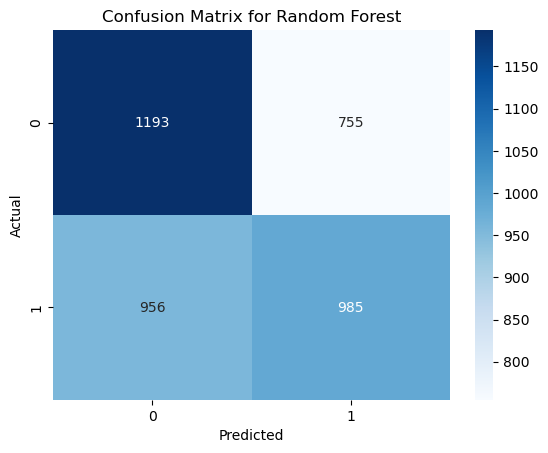

In [10]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()